# Voltage magnitude and angle at receiving end vs. active power consumed.

As a function of the load power factors, for a purely inductive line.

![title](figs/simple-PF.png)

You can play with other parameters to see the impact, e.g. X, or the nominal voltage.

**TODO** add current info.

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
from RSE.impedance import Impedance
from RSE.phasor import Phasor
import math
from cmath import phase
import numpy as np
import matplotlib.pyplot as plt


# Data
Nominal_voltage = 2e2 # [V]
Vs = Phasor(Nominal_voltage, 0)  # [V]
X = 1.5  # [Ohm]
P_range = np.linspace(0, 1000, 100)  # [W]
phi_range = [-math.acos(0.9), 0, math.acos(0.9)] # 0.9 pf lagging, unity pf, 0.9 pf leading


<IPython.core.display.Javascript object>

In [3]:
def compute_Vr(P_range, phi=math.acos(0.9)):
    """
    Computes and plots Vr for an active power ranging in P_range and a given phi of the load.
    
    Motor convention.
    
    :param P_range: List of active power points [W] at which Vr is computed.
    :param phi: Phase difference between current and Vr at the load
    
    """
    Vr = []
    Q_range = []
    for P in P_range:
        # Active power transfer: P = -(Vs.mag*Vr.mag*sin(Vr.ang))/X
        # Let b = Vr.mag*sin(Vr.ang)
        b = -(P * X) / Vs.mag
        # Reactive power transfer: Q = (Vs.mag*Vr.mag*cos(Vr.ang)-Vr**2)/X
        # Let a = Vr.mag*cos(Vr.ang)
        # Hence a**2 - Vs.mag*a + X*Q + b**2= 0
        Q = P * math.tan(phi)
        Q_range.append(Q)
        discriminant = Vs.mag ** 2 - 4 * (X * Q + b ** 2)
        a = (
            Vs.mag + math.sqrt(discriminant)
        ) / 2  # The other solution yields infeasible voltages (try it).
        tmp = complex(a, b)
        Vr.append(Phasor(abs(tmp), phase(tmp)))

    plt.figure(figsize=(10, 7))
    plt.subplot(3, 1, 1)
    plt.plot(P_range, [x.mag / Nominal_voltage for x in Vr])
    plt.title("cos phi = %.2f, phi = %.3f" % (math.cos(phi), phi))
    plt.ylabel("$V_r$ [p.u]")  # Normalized by
    plt.subplot(3, 1, 2)
    plt.plot(P_range, [x.ang * 180 / math.pi for x in Vr])
    plt.ylabel("$\phi_r$ [deg]")
    plt.subplot(3, 1, 3)
    plt.plot(P_range, Q_range)
    plt.ylabel("$Q_r$ [var]")
    plt.xlabel("$P_r$ [W]")
    plt.show()

<IPython.core.display.Javascript object>

## Interactive plot 

In [4]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

interact(compute_Vr, phi=math.acos(0.9), P_range=fixed(P_range))

interactive(children=(FloatSlider(value=0.45102681179626236, description='phi', max=1.353080435388787, min=-0.…

<function __main__.compute_Vr(P_range, phi=0.45102681179626236)>

<IPython.core.display.Javascript object>

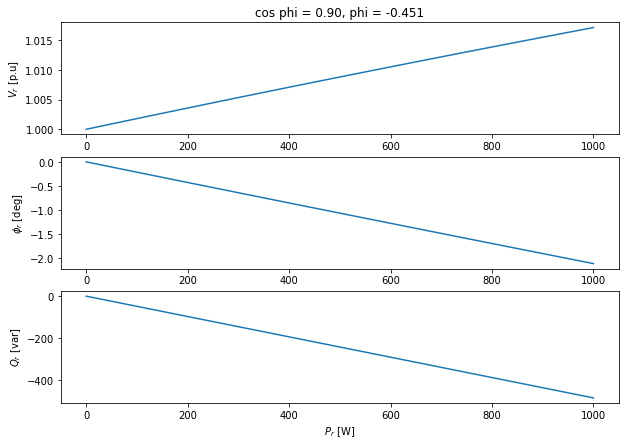

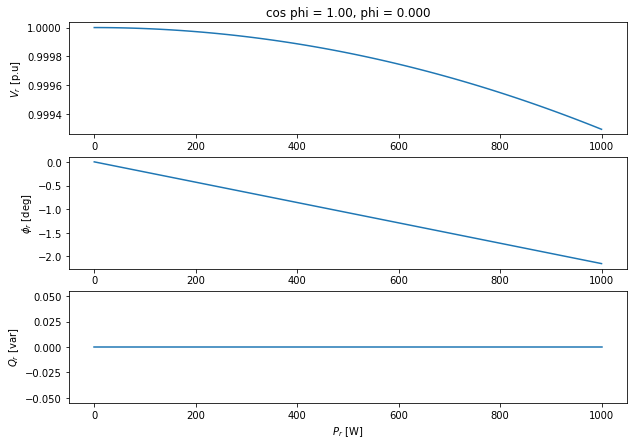

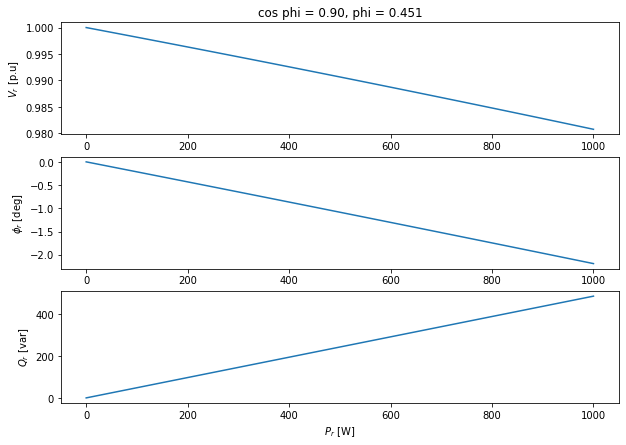

<IPython.core.display.Javascript object>

In [5]:
for phi in phi_range:
    compute_Vr(P_range, phi)